# Лабораторная работа №3. Регрессионный анализ 2024

## Цель работы

Изучение алгоритмов и методов регрессии на практике.

## Выполнение работы

Лабораторная работа состоит из 3 частей.

### Часть 1 - Простая линейная регрессия

Набор данных:

|<!--  -->|<!---->|<!---->|<!---->|<!---->|<!---->|<!---->|<!---->|
|:-------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| **x1**  |   3   |   3   |   6   |   6   |   7   |   8   |   9   |
| **x2**  |   9   |   8   |   9   |   7   |   4   |   5   |   3   |
| **y**   | 20.9  | 20.7  | 20.8  | 20.9  | 22.8  | 22.4  | 22.5  |


Необходимо обучить модель простой (парной) линейной регрессии, используя для обучения значения х1 и y.

Для начала создается датафрейм, куда помещаются изучаемые данные.

In [1]:
import pandas as pd

x1 = [3, 3, 6, 6, 7, 8, 9]
x2 = [9, 8, 9, 7, 4, 5, 3]
y = [20.9, 20.7, 20.8, 20.9, 22.8, 22.4, 22.5]

df = pd.DataFrame(data={'x1': x1, 'x2': x2, 'y': y})
display(df)

,x1,x2,y
0,3,9,20.9
1,3,8,20.7
2,6,9,20.8
3,6,7,20.9
4,7,4,22.8
5,8,5,22.4
6,9,3,22.5


Далее данные делятся на обучающую и валидационную выборки с помощью функции `train_test_split` , в результате применения которой получается четыре набора значений: данные с признаками (X_train) для обучения модели, данные с признаками (X_test) для проверки, данные с целевым признаком (y_train) для обучения и данные проверки результата обучения (y_test).

При этом на обучение попадает 66% всего набора данных. Для реализации регрессии импортируется класс `LinearRegression` из `sklearn` и создается его экземпляр, а затем с помощью `fit` модель обучается, на вход `fit` принимает тренировочный набор X и y (X_train, y_train). После обучения выполняются прогнозы с помощью `predict`, при этом предсказывать нужно на отложенном валидационном наборе данных (X_test).

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df['x1']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.33,
                                                   random_state=1)

model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)
predictions_valid = model.predict(np.array(X_test).reshape(-1,1))

В переменной `predictions_valid` хранятся все предсказанные значения для X_test . Можно сравнить предсказания с исходными, создав датафрейм из исходных известных значений ( y_test ) и предсказанных моделью `predictions_valid` . Кроме того, важно оценить качество алгоритма с помощью метрик MSE (средняя квадратичная ошибка), MAE (средняя абсолютная ошибка), RMSE (среднеквадратичная ошибка) и R2 (коэффициент детерминации).

In [3]:
from sklearn import metrics

df_match = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_valid })

display(df_match)

print('Оценка качества алгоритмов:')
print('MSE:', metrics.mean_squared_error(y_test, predictions_valid))
print('MAE:', metrics.mean_absolute_error(y_test, predictions_valid))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_valid)))
print('R2:', metrics.r2_score(y_test, predictions_valid))

,Actual,Predicted
6,22.5,22.80
2,20.8,21.75
1,20.7,20.70


Оценка качества алгоритмов:
MSE: 0.33083333333333304
MAE: 0.4166666666666667
RMSE: 0.5751811308912463
R2: 0.5150651465798051


Выводы по метрикам:

MSE = 0.33 — довольно низкое значение, что указывает на хорошую точность модели.

MAE = 0.42 — указывает, что в среднем предсказания отличаются от реальных значений на 0.42, что является неплохим показателем.

RMSE = 0.58 — указывает на небольшую ошибку в предсказаниях.

R2 = 0.52 — среднее значение (52%) означает что, что модель объясняет только половину всех данных, что не является хорошим показателем.

Основываясь на показателях, можно сделать вывод, что модель плохо обучена, что обусловлено малым размером исследуемого датасета.

Строится линия регрессии, для чего сначала находятся коэффициенты a и b для графика прямой (y = ax + b) с помощью coef_ и intercept_.

Затем строится распределение точек исходного датасета df и линия регрессии.

a = 0.35000000000000026 
b = 19.65 
уравнение прямой: y = 0.35x + 19.65



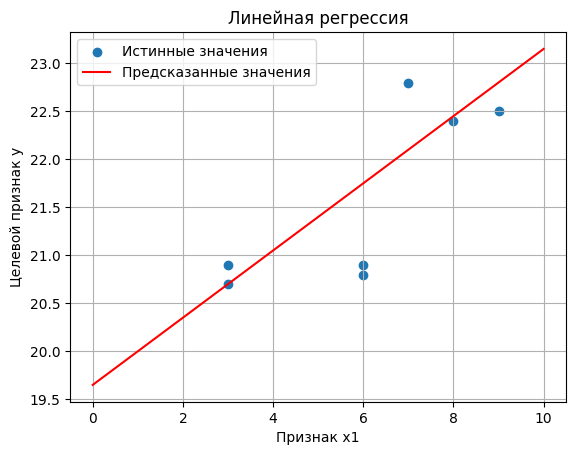

In [4]:
import matplotlib.pyplot as plt

a = model.coef_
b = model.intercept_
print(f"a = {a[0]} \nb = {b} \nуравнение прямой: y = {round(a[0], 2)}x + {round(b, 2)}\n")

plt.scatter(X, y, label='Истинные значения')
plt.plot([0, 10], [a*0 + b, a*10 + b], "r", label='Предсказанные значения')
plt.grid("g")
plt.title('Линейная регрессия')
plt.xlabel('Признак x1')
plt.ylabel('Целевой признак y')
plt.legend()
plt.show()

График показывает, что существует линейная связь между переменными: чем больше значения x1, тем больше значения y.

Далее строится график с разницей предсказанного и истинного значения по каждой точке.

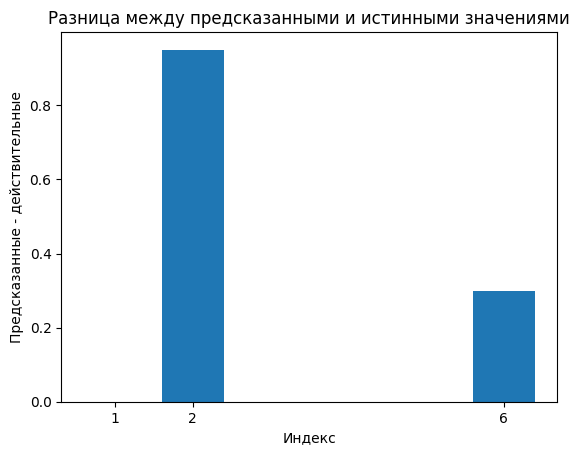

In [5]:
import seaborn as sns

df_match['Difference'] = df_match['Predicted'] - df_match['Actual']

plt.bar(df_match.index, df_match['Difference'])
plt.title('Разница между предсказанными и истинными значениями')
plt.xlabel('Индекс')
plt.ylabel('Предсказанные - действительные')
plt.xticks(df_match.index)
plt.show()

По графику видно, что для точки с индексом 2 довольно большая разница в значениях, для точки 6 незначительная. На диаграмме нет ортрицательных значений, что говорит о том, что предсказанные занчения всегда больше действительных.

Затем строится график истинных значений и предсказанных для сравнения.

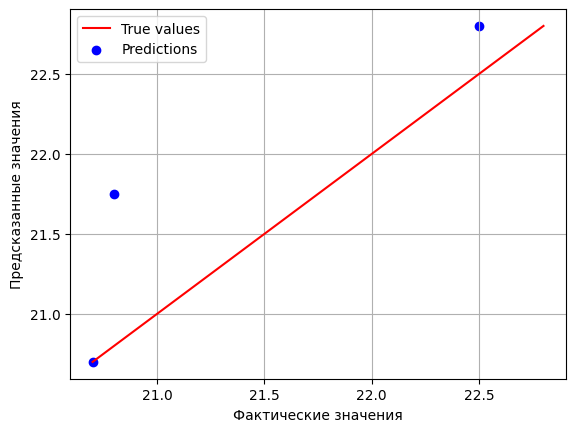

In [6]:
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='True values')
plt.scatter(y_test, predictions_valid, color='blue', label='Predictions')

plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

На графике наблюдаются:
- верхняя точка находится достаточно близко к действительным значениям, что указывает на высокую точность предсказания.
- точка 21.75 тоже находится близко к действительным значениям
- самая нижняя точка практически ровно ложится на прямую истинных значений

Несмотря на отклонения, предсказания находятся в пределах малого диапазона относительно истинных значений, что указывает на то, что модель выполняет свою задачу.

### Часть 2 - Полиномиальная регрессия

Набор данных для 2 части:

|<!--  -->|<!---->|<!---->|<!---->|<!---->|<!---->|<!---->|<!---->|
|:-------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| **x**   |   0   |   1   |   2   |   3   |   4   |   5   |   6   |
| **y**   | 12.7  | 20.0  | 24.9  | 21.5  | 21.3  | 20.4  | 13.4  |

Для начала создается датафрейм, куда помещаются изучаемые данные.

In [7]:
X = [0, 1, 2, 3, 4, 5, 6]
y = [12.7, 20.0, 24.9, 21.5, 21.3, 20.4, 13.4]

df2 = pd.DataFrame(data={'X': X, 'y': y})
display(df2)

,X,y
0,0,12.7
1,1,20.0
2,2,24.9
3,3,21.5
4,4,21.3
5,5,20.4
6,6,13.4


С использованием `PolynomialFeatures` для реализации модели
полиномиальной регрессии определеяется степень полинома. Для этого модель обучается полиномиальной регрессии. Затем выполняются предсказания и подсчитываются метрики качества регрессии (MSE, MAE, RMSE, R2).

Далее выполняется визуализация регрессии: точки данных и линия регрессия, а также метрик качества. Данные графики строятся для 8 значений степени полинома (degree).

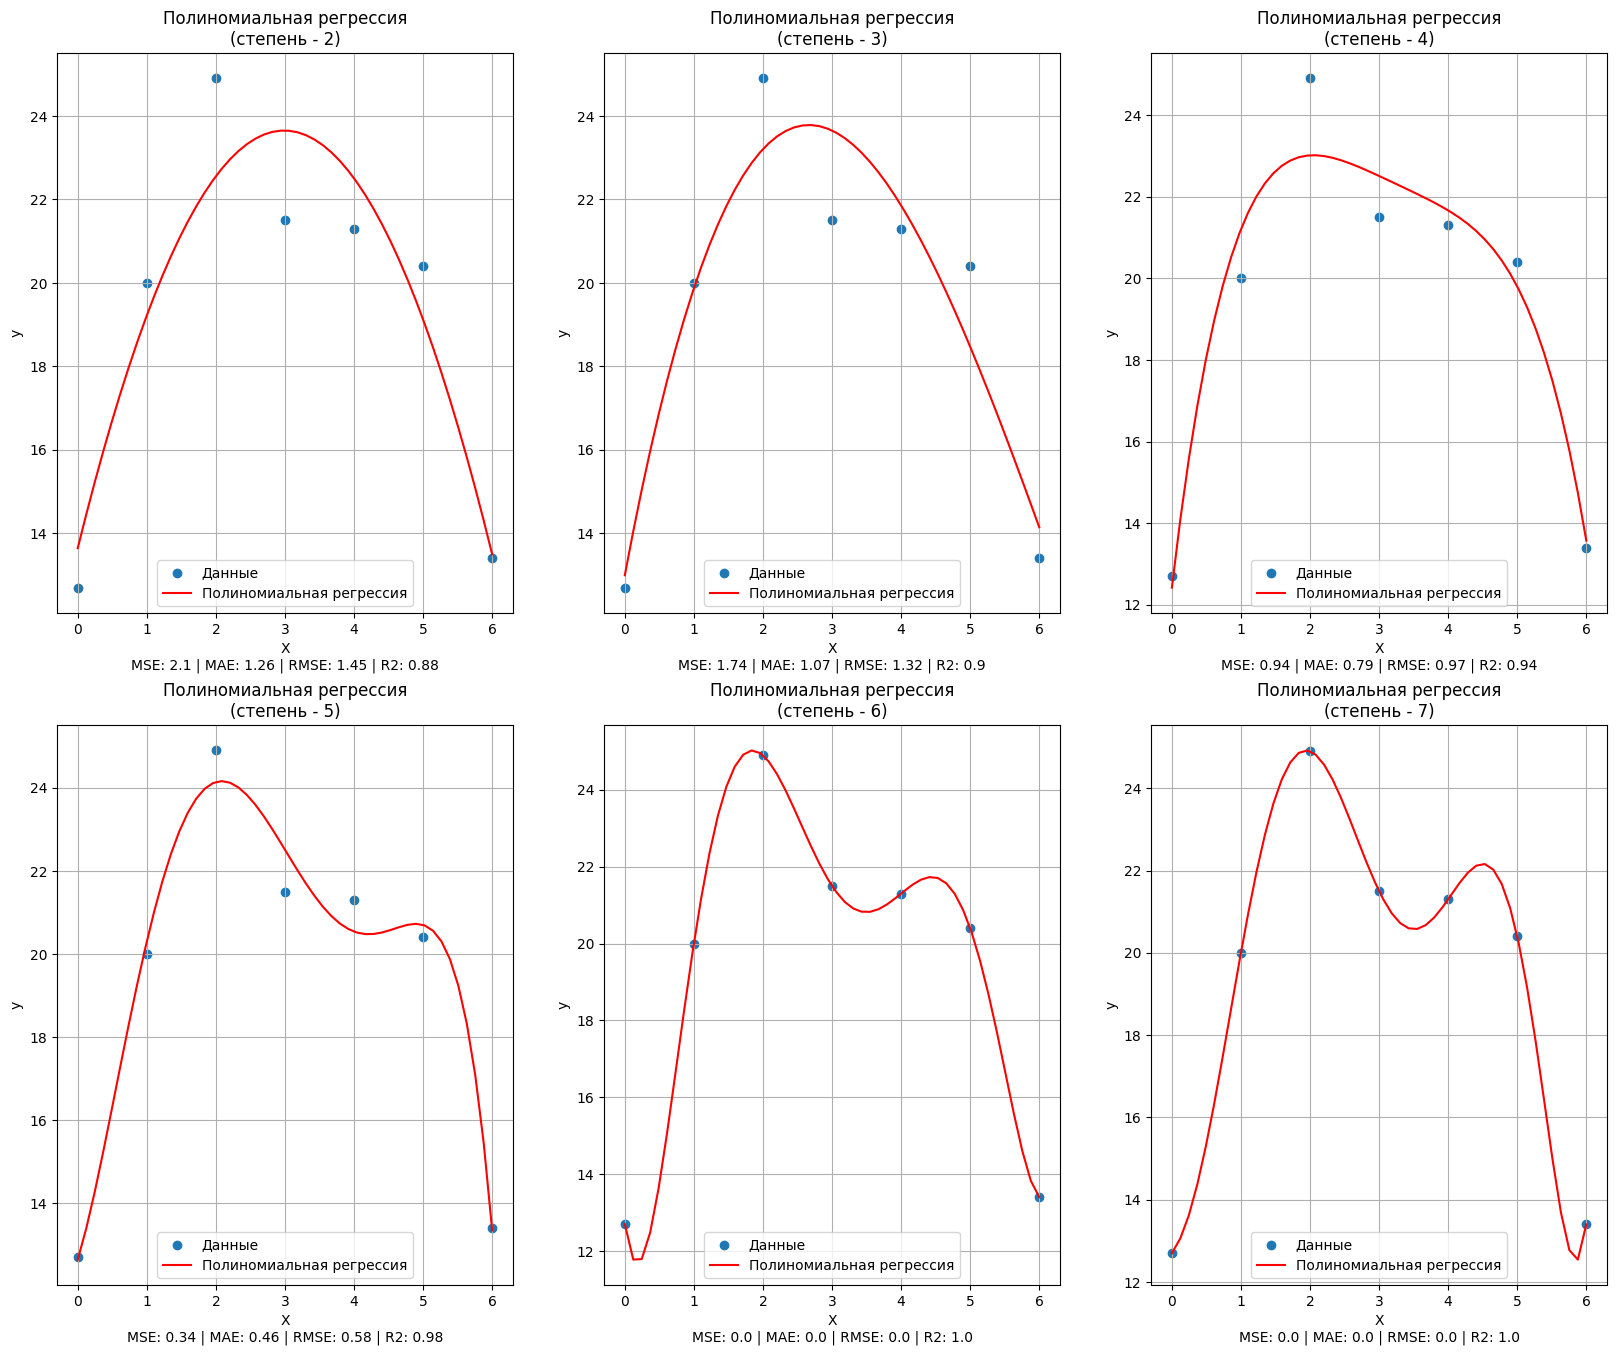

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

X_poly = np.array(df2['X']).reshape(-1, 1)
y_poly = np.array(df2['y'])

def plt_poly(x, y, degree):

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(X_poly)

    x_range = np.linspace(min(x), max(x), 50).reshape(-1, 1)
    X_range_poly = poly_features.transform(x_range)
    y_range = lin_reg.predict(X_range_poly)

    mse = round(metrics.mean_squared_error(y, y_pred), 2)
    mae = round(metrics.mean_absolute_error(y, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(metrics.r2_score(y, y_pred), 2)

    plt.subplot(2, 3, degree - 1)
    plt.scatter(x, y, label='Данные')
    plt.plot(x_range, y_range, 'r', label='Полиномиальная регрессия')
    plt.title(f'Полиномиальная регрессия\n(степень - {degree})')
    plt.ylabel('y')
    plt.xlabel('X\n'f'MSE: {mse} | MAE: {mae} | RMSE: {rmse} | R2: {r2}')
    plt.legend(loc='lower center')
    plt.grid()

plt.figure(figsize=(20, 16))

for degree in range(2, 8):
    plt_poly(X_poly, y_poly, degree)

plt.show()

Выводы:
- видно, что при значении степени полинома ниже 5 модели описывают не все данные, что указывает на недообученность модели;
- видно, что при всех значениях степени больше 5 модели слишком точно описывают данные, так как все значения ошибок равны нулю, а R2 = 1, что указывает на переобучение модели.

Для обучения модели используется степень полинома 5.

Далее модель обучается полиномиальной регрессии с выбранной степенью полинома (5). Затем выполняются предсказания и подсчитываются метрики качества регрессии (MAE, R2). Затем выводится таблица с исходными данными и предсказанными для сравнения и выполняется визуализация регрессии: точки и линия регрессия, а также метрик качества.

,Actual,Predicted
0,12.7,12.649459
1,20.0,20.303247
2,24.9,24.141883
3,21.5,22.510823
4,21.3,20.541883
5,20.4,20.703247
6,13.4,13.349459


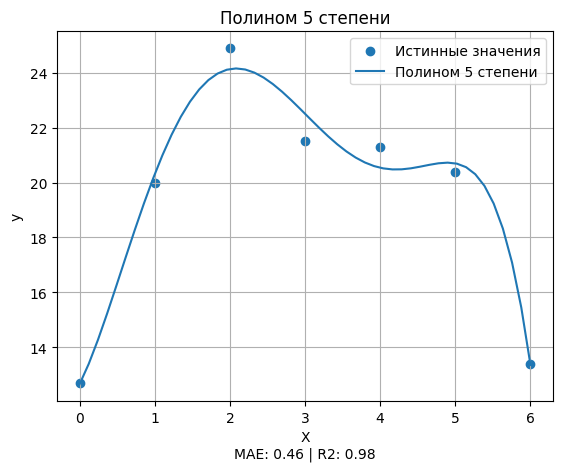

In [9]:
degree = 5
poly_features = PolynomialFeatures(degree=degree)
X_poly_transformed = poly_features.fit_transform(X_poly)

lin_reg = LinearRegression()
lin_reg.fit(X_poly_transformed, y_poly)

y_pred = lin_reg.predict(X_poly_transformed)

mae = round(metrics.mean_absolute_error(y_poly, y_pred), 2)
r2 = round(metrics.r2_score(y_poly, y_pred), 2)

df_match2 = pd.DataFrame({'Actual': y_poly, 'Predicted': y_pred})
display(df_match2)

x_range = np.linspace(min(X), max(X), 50).reshape(-1, 1)
X_range_poly = poly_features.transform(x_range)
y_range = lin_reg.predict(X_range_poly)


plt.scatter(X_poly, y_poly, label='Истинные значения')
plt.plot(x_range, y_range, label=f'Полином {degree} степени')
plt.title(f'Полином {degree} степени')
plt.ylabel('y')
plt.xlabel(f'X\nMAE: {mae} | R2: {r2}')
plt.legend()
plt.grid()
plt.show()

Полином 5-й степени хорошо подстраивается под данные. Это указывает на существование нелинейной связи между переменными.
- MAE = 0.46 означает, что в среднем предсказания модели отклоняются от истинных значений на 0.46 единиц, это неплохой результат.
- R2 = 0.98 близко к 1, что указывает на то, что модель объясняет 98% данных.Это очень хороший результат и говорит о том, что модель эффективно описывает связь между переменными


Далее те же действия повторяются со степенью полинома равной 4.

,Actual,Predicted
0,12.7,12.424459
1,20.0,21.203247
2,24.9,23.016883
3,21.5,22.510823
4,21.3,21.666883
5,20.4,19.803247
6,13.4,13.574459


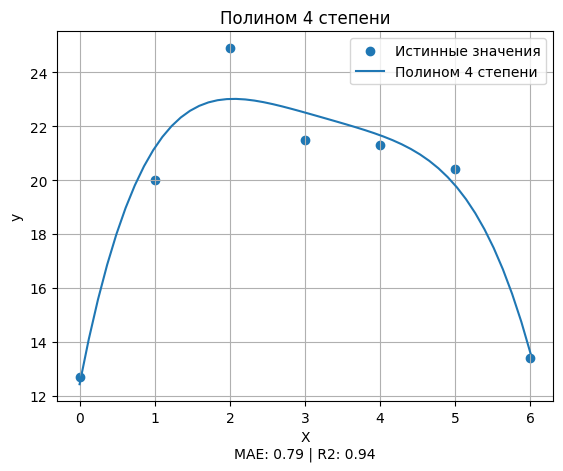

In [10]:
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly_transformed = poly_features.fit_transform(X_poly)

lin_reg = LinearRegression()
lin_reg.fit(X_poly_transformed, y_poly)

y_pred_2 = lin_reg.predict(X_poly_transformed)

mae = round(metrics.mean_absolute_error(y_poly, y_pred_2), 2)
r2 = round(metrics.r2_score(y_poly, y_pred_2), 2)

df_match = pd.DataFrame({'Actual': y_poly, 'Predicted': y_pred_2})
display(df_match)

x_range = np.linspace(min(X), max(X), 50).reshape(-1, 1)
X_range_poly = poly_features.transform(x_range)
y_range = lin_reg.predict(X_range_poly)


plt.scatter(X_poly, y_poly, label='Истинные значения')
plt.plot(x_range, y_range, label=f'Полином {degree} степени')
plt.title(f'Полином {degree} степени')
plt.ylabel('y')
plt.xlabel(f'X\nMAE: {mae} | R2: {r2}')
plt.legend()
plt.grid()
plt.show()

Полиномиальная регрессия 5 степени демонстрирует менее точное соответствие с исходными данными.
- MAE = 0.79 почти в 2 раза больше, чем при пятой степени полинома, что является менее хорошим показателем и указывает на большее абсолютное отклонение предсказанных данных от реальных;
- R2 = 0.94 указывает на низкую точность модели.

Можно сделать вывод, что полином 5-й степени лучше подходит под исследуемые данные.

### Часть 3 - Решение задачи регрессии различными методами

Производится загрузка CSV файла и вывод первых 5 строк.

In [11]:
import pandas as pd
cars = pd.read_csv('datasets/car_price.csv', sep=',')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Описание загруженного датасета:
1. Car_ID - Уникальный идентификатор каждого наблюдения (целое число)
2. Symboling - Присвоенный рейтинг страхового риска:
- +3 - автомобиль является рискованным,
- -3 - довольно безопасен. (категориальный)
3. carCompany - Название автомобильной компании
5. fueltype - Название автомобильной компании
6. aspiration - Аспирация, используемая в автомобиле
7. doornumber - Количество дверей в автомобиле
8. carbody - Кузов автомобиля
9. drivewheel - Тип ведущего колеса
10. enginelocation - Расположение двигателя автомобиля
11. wheelbase - Колесная база автомобиля
12. carlength - Длина машины
13. carwidth - Ширина машины
14. carheight - Высота машины
15. curbweight - Вес автомобиля без пассажиров и багажа
16. enginetype - Тип двигателя
17. cylindernumber - Баллон, помещенный в автомобиль
18. enginesize - Размер машины
19. fuelsystem - Топливная система автомобиля
20. boreratio - Коэффициент расточки вагона
21. stroke - Stroke or volume inside the engine (Numeric)
22. compressionratio - Рабочий ход или объем внутри двигателя
23. horsepower - Мощность в лошадиных силах
24. peakrpm - Пиковые обороты автомобиля
25. citympg - Пробег по городу
26. highwaympg - Пробег по шоссе
27. price - Цена авто

В качестве целевой переменной выбирается поле - `price` (цена авто). Для нее выполняется визуализация - строится гистограмма и boxplot

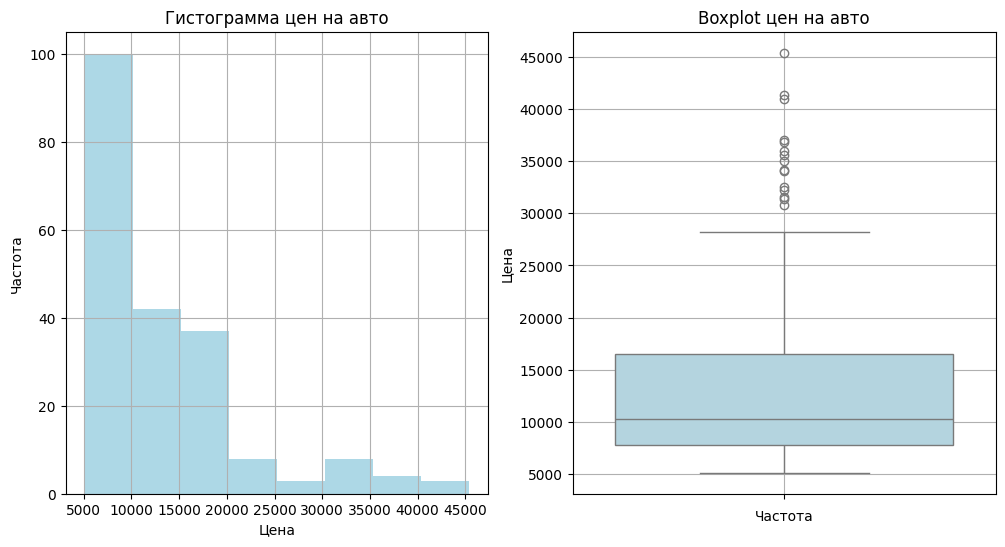

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(cars['price'], bins=8, color="lightblue")
plt.title('Гистограмма цен на авто')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid()

plt.subplot(1, 2, 2)
sns.boxplot(y=cars['price'], color='lightblue')
plt.title('Boxplot цен на авто')
plt.ylabel('Цена')
plt.xlabel('Частота')
plt.grid()

plt.show()

Гистограмма показывает распределение цен на автомобили и показывает, что большинство автомобилей имеют цену в диапазоне до 20 000. Большое кол-во автомобилей имеют цену около 10 000 и менее.

Видно, что распределение ассиметричное и имеет правый хвост. Это указывает на то, что более дешевые авто преобладают на рынке.


Boxplot показывает медиану, первый и третий квартили. Из графика видно, что медиана цен находится на отметке примерно в 10 000, а небольшой межквартильный размах говорит о небольшом разбросе в данных. Однако наблюдаются выбросы, что говорит о наличии нескольких авто с очень высокими ценами.

Далее строится матрица диаграмм рассеяния для анализа взаимосвязи числовых параметров, но сначала пробег по городу и автомагистрали складывается в один столбец, а длина, ширина и высота авто отображается через столбец `size` (объем) для более удобного анализа.

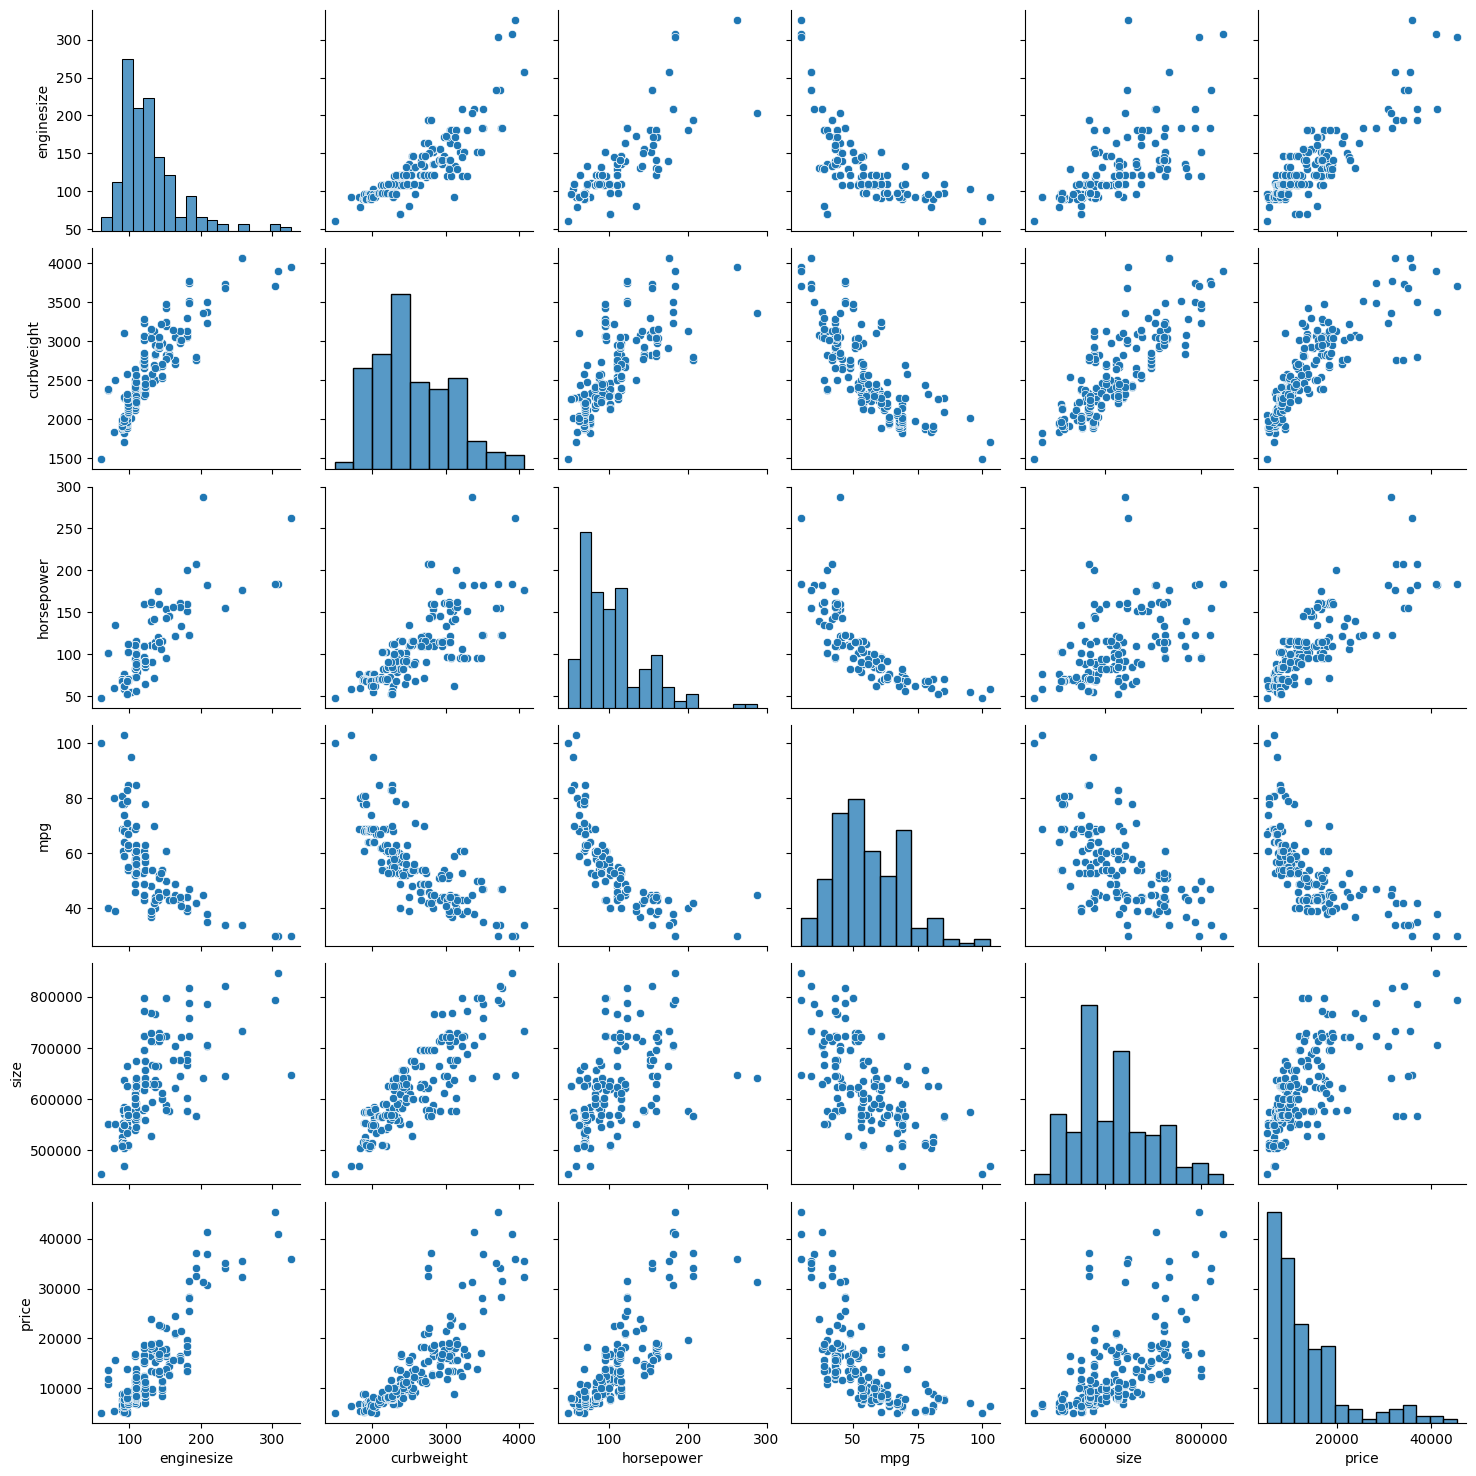

In [13]:
cars['mpg'] = cars['citympg'] + cars['highwaympg']
cars['size'] = cars['carlength'] * cars['carwidth'] * cars['carheight']
sns.pairplot(cars[['enginesize', 'curbweight',
                   'horsepower', 'mpg', 'size', 'price']])

Корреляции между переменными:
- price и horsepower - наблюдается положительная корреляция между ценой и лошадиными силами. Чем бастрее машина, тем она дороже
- curbweight и price - существуют сильные положительные корреляции между весом автомобиля и его ценой, что указывает на то, что дорогие автомобили имеют больший вес.
- mpg и price - наблюдается отрицательная корреляция между пробегом и ценой автомобиля: чем больше пробег, тем ниже цена
- price и enginesize - наблюдается положительная корреляция между ценой и размером двигателя автомобиля: чем больше двигатель, тем больше мощнойсть, соответсвенно больше цена
- enginesize и horsepower - наблюдается положительная корреляция между размером двигателя и мощностью, что логично, так как большие двигатели, имеют большую мощность.
- enginesize и curbweight - наблюдается положительная корреляция между размером двигателя и весом авто, что логично, так как большие двигатели, имеют больший вес.
- price и size - наблюдается положительная корреляция между ценой и объемом авто. Чем больше машина, тем она дороже.

Также есть много других зависимостей, которые четко видны на графиках. В некоторых переменных, видны выбросы.


Далее строковые (категориальные) данные переводятся в числовой формат

In [14]:
from sklearn.preprocessing import LabelEncoder

columns_obj = cars.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for i in columns_obj:
  cars[i] = label_encoder.fit_transform(cars[i])
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mpg,size
0,1,3,2,1,0,1,0,2,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,48,528019.904
1,2,3,3,1,0,1,0,2,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,48,528019.904
2,3,1,1,1,0,1,2,2,0,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,45,587592.640
3,4,2,4,1,0,0,3,1,0,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,54,634816.956
4,5,2,5,1,0,0,3,0,0,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,40,636734.832


Данные разделяются на обучающую, тестовую и валидационную выборки.

In [15]:
X = cars.drop(columns=["price"])
y = cars["price"]
X = pd.get_dummies(X, drop_first=True)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

Производится нормализация числовых данных с помощью `StandardScaler`

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

 Модель линейной регрессии обучается с помощью `LinearRegression`.

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Далее вычисляются метрики

In [18]:
from sklearn import metrics

y_val_pred = model.predict(X_val)

mae = metrics.mean_absolute_error(y_val, y_val_pred)
mse = metrics.mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_val, y_val_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 1952.4486285532898
MSE: 5726262.053651536
RMSE: 2392.960938597105
R²: 0.885135784081258


Модель демонстрирует довольно хорошую производительность. MAE и RMSE указывают на значительные, но допустимые средние ошибки. Высокое значение R2 (0.88) говорит о том, что модель объясняет 88% данных, что является хорошим показателем.

Создается и выводится датафрейм с истинными и предсказанными значениями.

In [19]:
cars_pred = pd.DataFrame({'Actual': y_test,
                          'Pred': y_pred}).reset_index(drop=True)
cars_pred.head()

,Actual,Pred
0,8916.5,5678.489345
1,6338.0,5250.257750
2,7957.0,7441.013325
3,15645.0,11230.792657
4,6529.0,8661.671091


Видно, что предсказанные значения значительно отличаются от тестовых.

Создается датафрейм с признаками и значениями коэффициентов для каждого признака. Делаются выводы относительно важности признаков.

In [20]:
coef = model.coef_
feature_names = cars.drop(columns=['price', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'carheight']).columns

cars_coef = pd.DataFrame({'признаки': cars.columns[1:], 'коэфф.': model.coef_})
cars_coef = cars_coef[cars_coef['признаки'].isin(feature_names)]

cars_coef['abs'] = cars_coef['коэфф.'].abs()
cars_coef = cars_coef.sort_values(by='abs', ascending=False).drop(columns='abs').reset_index(drop=True)

cars_coef

,признаки,коэфф.
0,fuelsystem,3457.401051
1,fueltype,-2481.122771
2,size,2299.155501
3,wheelbase,1592.611991
4,symboling,1322.398673
5,horsepower,1221.430580
6,peakrpm,1097.153271
7,enginetype,928.903487
8,carbody,-802.371586
9,drivewheel,-745.640517


- fuelsystem (тип топливной системы) с наибольшим положительным коэффициентом , что указывает на сильное положительное влияние на цену автомобиля. Это может означать, что автомобили с определенной топливной системой стоят значительно дороже.
- size (размер автомобиля) также имеет высокий положительный коэффициент, что подтверждает, что больший размер автомобиля влечет за собой более высокую цену.
- fueltpye (тип топлива) обладает большим отрицательным коэффициентом. Это означает, что автомобили с определенным типом топлива в целом дешевле, чем с другими типами.
- признак wheelbase (колесная база) способствует увеличению стоимости автомобиля.
- признак horsepower также способствует увеличению цены авто.

Результаты анализа коэффициентов показывают, что тип топливной системы и размер являются ключевыми факторами, влияющими на цену автомобиля. В то же время, тип топлива и некоторые другие признаки оказывают отрицательное влияние на цену.

Выполняется визуализация. На графике отображается фактическое и предсказанное значения.

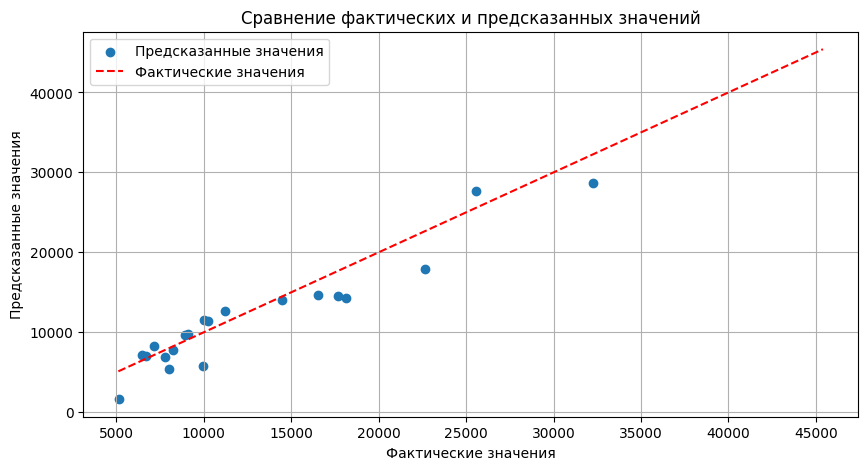

In [21]:
y_pred = model.predict(X_val)

plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_pred, label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Фактические значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений')
plt.legend()
plt.grid()
plt.show()

Следующим шагом производится реализация регрессии методом K-ближайших соседей

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

y_knn_pred = knn_model.predict(X_val)

Далее подсчитываются метрики

In [23]:
knn_mse = metrics.mean_squared_error(y_val, y_knn_pred)
knn_mae = metrics.mean_absolute_error(y_val, y_knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = metrics.r2_score(y_val, y_knn_pred)

print(f'MSE: {knn_mse}')
print(f'MAE: {knn_mae}')
print(f'RMSE: {knn_rmse}')
print(f'R2: {knn_r2}')

MSE: 6886820.374000001
MAE: 1954.9299999999998
RMSE: 2624.2752092720766
R2: 0.8618559166484026


Модель на основе KNN показывает средние результаты. По высоким значениям MSE и MAE можно сделать вывод, что присутсвуют ошибки. Несмотря на это, коэффициент R2 указывает на то, что модель способна объяснить большую часть вариаций в данных.

Выполняется визуализация фактических и предсказанных значений.

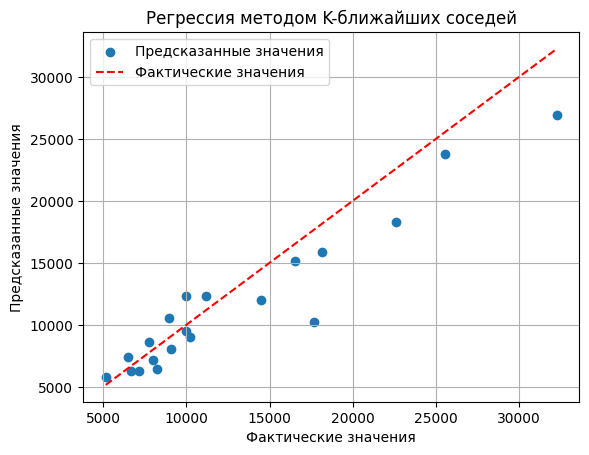

In [24]:
plt.scatter(y_val, y_knn_pred, label='Предсказанные значения')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Фактические значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Регрессия методом K-ближайших соседей')
plt.grid("g")
plt.legend()
plt.show()

Далее производится сравнение результатов, полученных всеми методами.


In [25]:
metrics = pd.DataFrame({'Линейная регрессия': [mae, mse, rmse,r2],
                        'KNN': [knn_mae, knn_mse, knn_rmse, knn_r2]},
                       index=['MAE', 'MSE', 'RMSE', 'R2'])
metrics.round(2)

,Линейная регрессия,KNN
MAE,1952.45,1954.93
MSE,5726262.05,6886820.37
RMSE,2392.96,2624.28
R2,0.89,0.86


Линейная регрессия показывает хорошую точность с меньшими значениями метрик MAE, MSE и RMSE, что делает её предпочтительной моделью для исследуемого набора данных.

R2 показывает, что линейная регрессия объясняет большую часть данных, чем KNN.

Все метрики указывают на то, что более предпочтительно использовать именно линейную регрессию.

Далее визуализируются истинные и предсказанные значения на одном графике для разных методов.

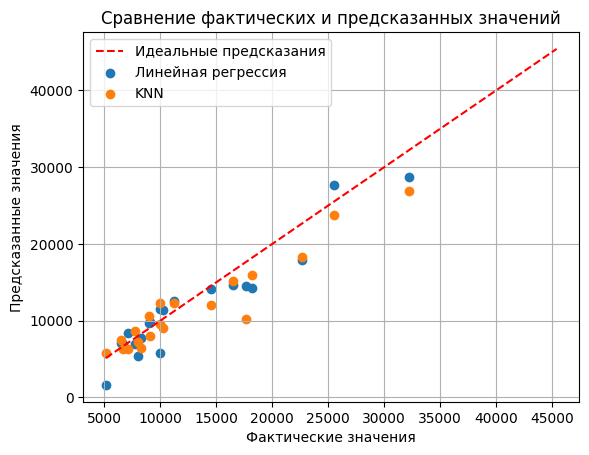

In [26]:
y_pred = model.predict(X_val)
y_knn_pred = knn_model.predict(X_val)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Идеальные предсказания')

plt.scatter(y_val, y_pred, label='Линейная регрессия')
plt.scatter(y_val, y_knn_pred, label='KNN')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid()
plt.legend()
plt.show()

Большинство значений линейной регрессии находятся близко к линии истинных значений, что указывает на то, что данная модель хорошо справляется с предсказаниями. Однако наблюдаются некоторые точки, которые находятся далее от линии, что говорит о наличии ошибочных предсказаний.

KNN также показывает довольно хорошие предсказания, но на диаграмме завметно, что небольшая часть точек распределена более разбросано, чем при линейной.

Это указывает на первосходство линейной регрессии над КНН-регрессией для данного датасета.

На основе выведенных метрик можно сделать вывод о том, что более предпочтительным является использование линейной регрессии вместо KNN, так как первая более точно предсказывает данные и объясняет большую часть изучаемых данных по сравнению с методом К-ближайших соседей.


## Вывод


В ходе выполнения лабораторной работы были изучены алгоритмы и методы регрессионного анализа данных для предсказания целевых переменных.

В первой части работы была построена простая линейная регрессия. Производилось обучение модели, считались метрики, визуально сравнивались исходные данные и предсказанные. Затем по проделанной работе были сделаны выводы.


Во второй части работы сначала была определена наилучшая степень полинома, а затем построена полиномиальная регрессия для двух степеней с помощью `PolynomialFeatures`. По построенной регрессии были сделаны выводы.

В третьей части работы был подгружен датасет с информацией о ценах автомобилей из CSV файла. Для данного датасета были реализованы две модели: линейная регрессия и метод K-ближайших соседей (KNN). Каждая из моделей была обучена на тренировочной выборке и протестирована на тестовой, после чего были рассчитаны метрики оценки качества моделей, такие как MAE, MSE, RMSE и R2.

На основе сравнения обоих регрессий, путем сравнения метрик и визуализации истинных и предсказанных значений на одном графике для разных методов, был сделан вывод, что для данного набора данных линейная регрессия имеет более высокую точность предсказаний, с меньшими значениями MAE, MSE и RMSE, а также большим значением R2, чем KNN.

## Выполнение дополнительных заданий


Модель обучается с помощью `RandomForestRegressor`. Результаты, полученные всеми методами сравниваются. Выводистя таблица с метриками и названиями всех моделей, которые были обучены.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)

mae_rf = mean_absolute_error(y_val, y_val_pred)
mse_rf = mean_squared_error(y_val, y_val_pred)
r2_rf = r2_score(y_val, y_val_pred)
rmse_rf = np.sqrt(mse_rf)

print(f'MAE: {round(mae_rf, 3)}')
print(f'MSE: {round(mse_rf, 3)}')
print(f'RMSE: {round(rmse_rf, 3)}')
print(f'R2: {round(r2_rf, 3)}')

MAE: 1389.096
MSE: 4008242.563
RMSE: 2002.06
R2: 0.92


Модель случайного леса показывает хорошие результаты по всем метрикам.

В среднем предсказанная цена автомобиля отличается от истинной на 1389 единиц, что является довольно низким значением ошибки, учитывая сколько стоят автомобили.

Значение RMSE = 2002.06 свидетельствует о том, что предсказание может отклоняться от фактической цены на около 2002.06 единиц, что является приемлемым хорошим результатом.

R2 = 92% говорит о том, что 92% вариаций в ценах автомобилей можно объяснить данной моделью.

In [31]:
import pandas as pd

metrics = {
    "Модель": ["Линейная регрессия", "KNN", "Случайный лес"],
    "MAE": [mae, knn_mae, mae_rf ],
    "MSE": [mse, knn_mse, mse_rf, ],
    "RMSE": [rmse, knn_rmse, rmse_rf, ],
    "R2": [r2, knn_r2, r2_rf, ]
}

metrics_df = pd.DataFrame(metrics)

display(metrics_df.round(2))

,Модель,MAE,MSE,RMSE,R2
0,Линейная регрессия,1952.45,5726262.05,2392.96,0.89
1,KNN,1954.93,6886820.37,2624.28,0.86
2,Случайный лес,1389.10,4008242.56,2002.06,0.92


По результатам сравнительной таблицы можно сделать следующие выводы:
- случайный лес показал наименьшую MAE, что указывает на меньшую среднюю ошибку предсказания по сравнению с линейной регрессией и KNN.
- случайный лес также имеет самое низкое значение MSE, в то время как MSE для линейной регрессии и KNN значительно выше. Это подтверждает превосходство случайного леса.
- по значениям RMSE соответсвенно можно сделать такие же выводы
- случайный лес имеет наибольшее значение R2, что означает, что 92% вариации цен автомобилей может быть объяснено этой моделью. Остальные модели показывают более низкие результаты.

По всем представленным метрикам случайный лес демонстрирует лучшие показатели среди рассмотренных моделей. Это делает его предпочтительным выбором для задачи предсказания цен автомобилей в данном контексте.